In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
home = os.path.expanduser('~')
path = os.path.join(home,'video_resources','exp_output_test0')
file = 'datosgraph.pd1'
ruta = os.path.join(path,file)

In [6]:
df0 = pd.read_pickle(ruta)

ModuleNotFoundError: No module named 'sql_face'

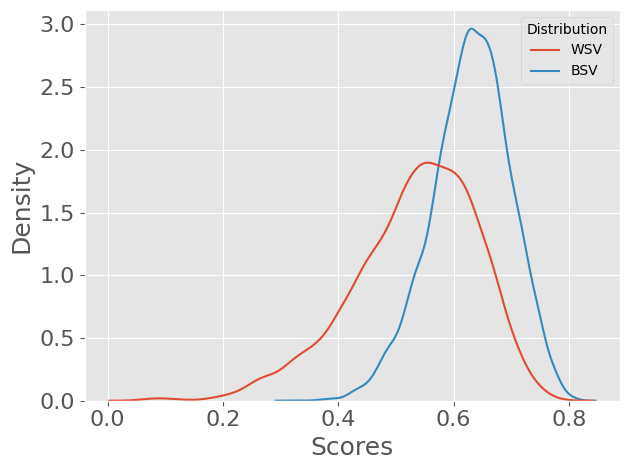

In [8]:
df0.__dict__
for index , row in df0.iterrows():
    scores = row['Scores'].flatten()
    Y = row['Y calibration'].flatten()

    distribution = ['WSV' if y else 'BSV'  for y in Y] 

    df_plot = pd.DataFrame({'Distribution':distribution, 'Scores':scores})
    WSV = [score for score,yval in zip(scores,Y) if yval]
    BSV = [score for score,yval in zip(scores,Y) if not yval]
    plt.hist([WSV,BSV], bins = 50,density = True, histtype= 'step', label = ['WSV','BSV'])
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

    plt.legend()
    plt.style.use('ggplot')
    #plt.show()
    plt.savefig('plt_hist')
    #plt.style.use('ggplot')
    plt.close()


    a = sns.kdeplot(df_plot, x= 'Scores', hue= 'Distribution', label = ['WSV','BSV'])
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    

    plt.xlabel('Scores',fontsize= 18)
    plt.ylabel('Density',fontsize = 18)
    plt.tight_layout()
    plt.savefig('sns_kdeplot')

